# Item Graph

This is a new module coming at version 2.4.1 of the ArcGIS API for Python (April 2025).

### Directional dependency graph that represents relationships between items.

#### Import necessary classes and connect to our Portal

In [2]:
from arcgis.gis import GIS
from arcgis.apps.itemgraph import ItemGraph, create_dependency_graph
gis = GIS(profile="geosaurus")

### Let's go through a basic workflow: make a graph and view dependencies

In [3]:
# first, grab a survey to see everything that is required for it to exist
survey_id = "02d0702e1ef0468083f780791670c969"
survey = gis.content.get(survey_id)

# create the dependency graph
graph = create_dependency_graph(gis, [survey])

In [4]:
# list all items that are in the graph
graph.all_items()

[ItemNode(id: 02d0702e1ef0468083f780791670c969, item: San Diego Parrot Sightings),
 ItemNode(id: a7192e06cfb446e1bab59849285e1038, item: San Diego Parrot Sightings_results),
 ItemNode(id: 41dd3cca32914cc7ae8fd3a727f44e17, item: San Diego Parrot Sightings),
 ItemNode(id: d818128edbab44099238bc44e4bf2df0, item: summary_individual_temp),
 ItemNode(id: 447ef32f6431488c9f9d7552f7d20ce0, item: individual_temp),
 ItemNode(id: 588f0e0acc514c11bc7c898fed9fc651, item: Topographic),
 ItemNode(id: 6a5d407b62954806ac31558c6774656f, item: summary_temp),
 ItemNode(id: 9fccd6b78482414994eb2c19f90a44c8, item: San Diego Parrot Sightings_form)]

## Next, we explore different ways to analyze your nodes

##### Grab an individual node and examine the structure

In [5]:
survey_node = graph.get_item(survey_id)
survey_node

ItemNode(id: 02d0702e1ef0468083f780791670c969, item: San Diego Parrot Sightings)

<Item title:"San Diego Parrot Sightings" type:Form owner:nparavicini_geosaurus>
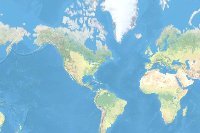

In [6]:
# see the item attached to the node
survey_node.item

##### We can see everything the survey immediately contains by calling contains()

In [7]:
survey_node.contains()

[ItemNode(id: a7192e06cfb446e1bab59849285e1038, item: San Diego Parrot Sightings_results),
 ItemNode(id: d818128edbab44099238bc44e4bf2df0, item: summary_individual_temp),
 ItemNode(id: 447ef32f6431488c9f9d7552f7d20ce0, item: individual_temp),
 ItemNode(id: 588f0e0acc514c11bc7c898fed9fc651, item: Topographic),
 ItemNode(id: 6a5d407b62954806ac31558c6774656f, item: summary_temp),
 ItemNode(id: 9fccd6b78482414994eb2c19f90a44c8, item: San Diego Parrot Sightings_form)]

##### We can also change the output format for any of these functions to id or item

In [8]:
survey_node.contains(out_format = "item")

[<Item title:"San Diego Parrot Sightings_results" type:Feature Layer Collection owner:nparavicini_geosaurus>,
 <Item title:"summary_individual_temp" type:Microsoft Word owner:nparavicini_geosaurus>,
 <Item title:"individual_temp" type:Microsoft Word owner:nparavicini_geosaurus>,
 <Item title:"Topographic" type:Web Map owner:esri_en>,
 <Item title:"summary_temp" type:Microsoft Word owner:nparavicini_geosaurus>,
 <Item title:"San Diego Parrot Sightings_form" type:Feature Layer Collection owner:nparavicini_geosaurus>]

##### We can also see the deep dependencies- showing all the items needed by the node to exist

In [9]:
survey_node.requires()

[ItemNode(id: 447ef32f6431488c9f9d7552f7d20ce0, item: individual_temp),
 ItemNode(id: a7192e06cfb446e1bab59849285e1038, item: San Diego Parrot Sightings_results),
 ItemNode(id: 9fccd6b78482414994eb2c19f90a44c8, item: San Diego Parrot Sightings_form),
 ItemNode(id: d818128edbab44099238bc44e4bf2df0, item: summary_individual_temp),
 ItemNode(id: 41dd3cca32914cc7ae8fd3a727f44e17, item: San Diego Parrot Sightings),
 ItemNode(id: 6a5d407b62954806ac31558c6774656f, item: summary_temp),
 ItemNode(id: 588f0e0acc514c11bc7c898fed9fc651, item: Topographic)]

##### In addition, we can grab a dependent item and see what items immediately contain it and need it to exist

In [10]:
result_form = graph.get_item("41dd3cca32914cc7ae8fd3a727f44e17")
result_form.contained_by()

[ItemNode(id: a7192e06cfb446e1bab59849285e1038, item: San Diego Parrot Sightings_results),
 ItemNode(id: 9fccd6b78482414994eb2c19f90a44c8, item: San Diego Parrot Sightings_form)]

In [11]:
result_form.required_by()

[ItemNode(id: 02d0702e1ef0468083f780791670c969, item: San Diego Parrot Sightings),
 ItemNode(id: a7192e06cfb446e1bab59849285e1038, item: San Diego Parrot Sightings_results),
 ItemNode(id: 9fccd6b78482414994eb2c19f90a44c8, item: San Diego Parrot Sightings_form)]

## More complex workflows: find broken items, visualize, save structure

##### What if we have an app that contains broken items? How can we easily find them?
##### The dependency construction will look for all item id's, but won't retrieve items from broken id's or outside org items.

In [12]:
storymap = gis.content.get("fd5801d2f66b43e1a20146d8761f758b")
story_graph = create_dependency_graph(gis, [storymap])
story_graph.all_items()

[ItemNode(id: fd5801d2f66b43e1a20146d8761f758b, item: Oh heavens),
 ItemNode(id: 35983e54e61a40b8ac03148e197452ac, item: PLACES: Arthritis),
 ItemNode(id: 3b7221d4e47740cab9235b839fa55cd7, item: PLACES: Local Data for Better Health),
 ItemNode(id: faa67b0af7914a2f9f4d96c561816c6e),
 ItemNode(id: 7099b3c2e979415e975d00e58afed77e, item: Map that should totally work),
 ItemNode(id: baaf98d1695f47db8d5dc701c0e5f864, item: Read-Only CA/OR Airports),
 ItemNode(id: 0384ujr43n53490890843t543ojf809re)]

##### Note how some of these items don't have items attached. This means they're inaccessible in this org or don't exist.
##### Let's find them!

In [13]:
for node in story_graph.all_items():
    if node.item == None:
        print(node.id)

faa67b0af7914a2f9f4d96c561816c6e
0384ujr43n53490890843t543ojf809re


##### Using matplotlib and networkx we can visualize how this item fits into the graph

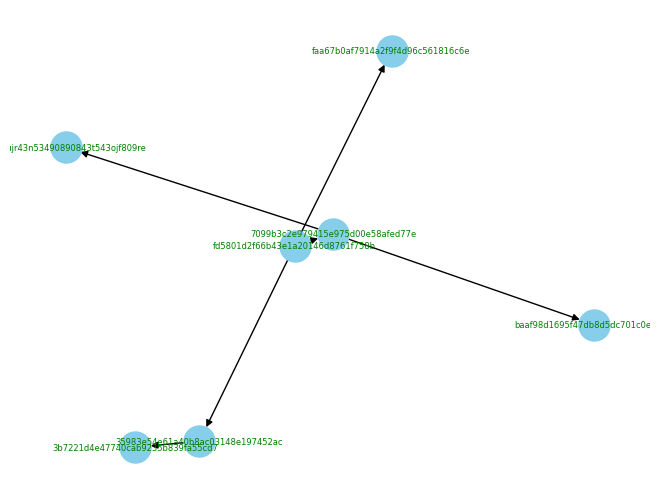

In [15]:
import matplotlib.pyplot as plt
import networkx as nx
pos = nx.spring_layout(story_graph)  # positions for all nodes
nx.draw(story_graph, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=6, font_color="green")
nx.draw_networkx_labels(story_graph, pos, labels=nx.get_node_attributes(story_graph, 'label'))

# Show the plot
plt.show()

##### We can see that one of them is from our root item, and one is from a dependent item
##### Let's look at the sub item

<Item title:"Map that should totally work" type:Web Map owner:nparavicini_geosaurus>
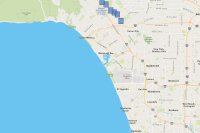

In [16]:
sub_node = story_graph.get_item("7099b3c2e979415e975d00e58afed77e")
webmap = sub_node.item
webmap

##### Now that we know where our problematic ids exist, we can replace them and fix our storymap
##### We can use the item class's `remap_data()` function to easily do this. Let's identify some replacements

In [17]:
bad_layer_id = "0384ujr43n53490890843t543ojf809re"
bad_webmap_id = "faa67b0af7914a2f9f4d96c561816c6e"
new_layer_id = "55c85385338d434ba1194d9b2c2a60c8"
new_webmap_id = "865ec0112fde477788c4f51c4a7baae6"

# we call remap_data() on the item containing the dependencies to be swapped
storymap.remap_data({bad_webmap_id : new_webmap_id}, force = True)
webmap.remap_data({bad_layer_id : new_layer_id}, force = True)

True

##### We can make a new graph from the storymap and see if everything looks correct

In [18]:
story_graph_updated = create_dependency_graph(gis, [storymap])
story_graph_updated.all_items()

[ItemNode(id: fd5801d2f66b43e1a20146d8761f758b, item: Oh heavens),
 ItemNode(id: 35983e54e61a40b8ac03148e197452ac, item: PLACES: Arthritis),
 ItemNode(id: 3b7221d4e47740cab9235b839fa55cd7, item: PLACES: Local Data for Better Health),
 ItemNode(id: 865ec0112fde477788c4f51c4a7baae6, item: clone map different layer id),
 ItemNode(id: 2113d04eade0432784e8edd336193e68, item: CA/OR Airports),
 ItemNode(id: 7099b3c2e979415e975d00e58afed77e, item: Map that should totally work),
 ItemNode(id: baaf98d1695f47db8d5dc701c0e5f864, item: Read-Only CA/OR Airports),
 ItemNode(id: 55c85385338d434ba1194d9b2c2a60c8, item: polygons),
 ItemNode(id: d3a24f71ee864118968fa24e572c6dc2, item: polygons)]

##### Great, they all have items now!
##### Finally, say we want to save this graph for later use - we can write it out to a file

In [19]:
out_file = story_graph_updated.write_to_file(r"C:\Users\nan11818\Downloads\demo_graph.gml")
out_file

'C:\\Users\\nan11818\\Downloads\\demo_graph.gml'

##### To load it back in and work with it from this state we can use the `load_from_file()` method.
##### This is useful for saving graph states in an org where dependencies are changing.

In [20]:
from arcgis.apps.itemgraph import load_from_file

story_graph_from_disk = load_from_file(out_file, gis)
story_graph_from_disk.all_items()

[ItemNode(id: fd5801d2f66b43e1a20146d8761f758b, item: Oh heavens),
 ItemNode(id: 35983e54e61a40b8ac03148e197452ac, item: PLACES: Arthritis),
 ItemNode(id: 3b7221d4e47740cab9235b839fa55cd7, item: PLACES: Local Data for Better Health),
 ItemNode(id: 865ec0112fde477788c4f51c4a7baae6, item: clone map different layer id),
 ItemNode(id: 2113d04eade0432784e8edd336193e68, item: CA/OR Airports),
 ItemNode(id: 7099b3c2e979415e975d00e58afed77e, item: Map that should totally work),
 ItemNode(id: baaf98d1695f47db8d5dc701c0e5f864, item: Read-Only CA/OR Airports),
 ItemNode(id: 55c85385338d434ba1194d9b2c2a60c8, item: polygons),
 ItemNode(id: d3a24f71ee864118968fa24e572c6dc2, item: polygons)]